## Markov Random Fields (MRFs) - Edge detection

A Markov Random Field is a model used in the context of undirected graphical models. Instead of a sequence of states like in Markov processes, MRFs consider a set of variables (which can be organized, for instance, in a grid-like structure in image processing). The key property of an MRF is that a variable is conditionally independent of all other variables given its neighbors in the graph.

### Differences with Markov Processes:

- Nature of Model:

    Markov processes usually describe the evolution of a system over time.
    MRFs model dependencies among variables that might not necessarily have a temporal ordering.

- Graph Type:

    Markov processes can be visualized with directed graphs (especially for discrete-time Markov chains).
    MRFs are represented using undirected graphs.

- Dependency:

    In Markov processes, the next state's probability depends only on the current state.
    In MRFs, a variable's probability distribution might depend on the states of its neighbors.

### Application:

**Edge Detection:** The boundaries and transitions in an image can be detected using Markov processes by modeling the dependencies between pixels.

In [1]:
################################################################################################
# RUNME ONCE: only if the imports in the next cell does not work.
# Run this cell once in order to install the dependencies needed for the lab. 
# After running this cell, remember to restart the kernel and proceed executing the next cells.
################################################################################################

!pip3 install pillow matplotlib numpy opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
    --------------------------------------- 0.8/38.8 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.8/38.8 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.8/38.8 MB 2.0 MB/s eta 0:00:20
   - -------------------------------------- 1.8/38.8 MB 1.8 MB/s eta 0:00:21
   -- ------------------------------------- 2.4/38.8 MB 2.1 MB/s eta 0:00:18
   --- ------------------------------------ 3.1/38.8 MB 2.3 MB/s eta 0:00:16
   --- ------------------------------------ 3.7/38.8 MB 2.2 MB/s eta 0:00:16
   ---- ----------------------------------- 4.2/38.8 MB 2.4 MB/s eta 0:00:15
   ----- ---------------------------------- 5.0/38.8 MB 2.5 MB/s eta 0:00:14
   ----- ---------------------------------- 5.8/38.8 MB 2.6 MB/s eta 0:00:13
   ----- ---------------------------------- 5.8/38.8 MB 2.6 MB/s eta 0:00:13
   ------ ---

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

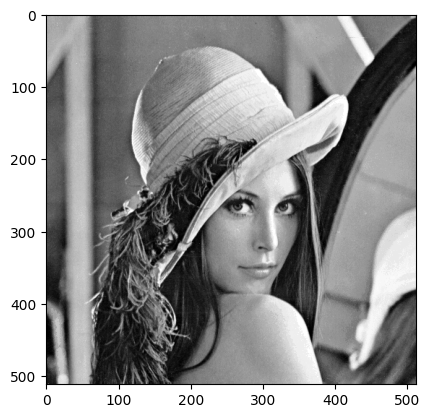

In [9]:
# Load an image using Pillow and convert to grayscale
image = Image.open('lena_color.png').convert('L')
plt.imshow(image, cmap='gray')
image = np.array(image)

In [10]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)
print(laplacian)

[[  0.   5. -10. ... -18.  -6.  48.]
 [  0.   5. -10. ... -18.  -6.  48.]
 [  0.   5. -10. ... -18.  -6.  48.]
 ...
 [  0.   4.  -1. ...   1.  -6.  25.]
 [  0.   9. -18. ...  -8.  -3. -13.]
 [  0.   9.  48. ...  -4.   1.  -2.]]


In [11]:
# Perform edge detection using Canny filter
edges_canny = cv2.Canny(image, 100, 200)

### Markov Random Field Edge Detection Algorithm

Implement the following algorithm 

**Input:**
- `img`: Grayscale image of dimensions H x W
- `percentile`: Percentile for dynamic thresholding (default: 90)
- `extended_neighborhood`: Boolean indicating if diagonal neighbors should be considered (default: True)
- `gradient_weight`: Weight for the gradient term in the energy calculation (default: 0.5)

**Output:**
- `edges`: Binary image indicating detected edges

**Procedure:**

1. Initialize `energy` matrix of size H x W with zeros.
2. Define a helper function `gradient`:
    - Input: `img`, `i`, `j`
    - Computes x-gradient as difference between `img[i+1, j]` and `img[i, j]`.
    - Computes y-gradient as difference between `img[i, j+1]` and `img[i, j]`.
    - Returns the magnitude of the gradient.
3. For each pixel `(i, j)` in `img`:
    - Calculate `basic_energy` as the sum of absolute differences between current pixel and its right and bottom neighbors.
    - If `extended_neighborhood` is True, add to `basic_energy` the sum of absolute differences between current pixel and its diagonal neighbors.
    - Calculate `grad_energy` using the `gradient` function.
    - Compute `combined_energy` as a weighted sum of `basic_energy` and `grad_energy` using the `gradient_weight`.
    - Set `energy[i, j]` to `combined_energy`.
4. Compute the dynamic threshold as the `percentile` of all values in `energy`.
5. Threshold `energy` to create the `edges` image: pixels in `energy` greater than the threshold are set to 255 (white) and others are set to 0 (black).
6. Return `edges`.

In [12]:
def gradient (img,i,j):
    """
    Function to clculate gradient 
    input : -img: image that we work on
            -i,j:pixel coordinate 
    output : gradient magnitude at (i,j)
    """
    gx=img[i+1][j]-img[i][j]
    gy=img[i][j+1]-img[i][j]

    return np.sqrt(gx**2+gy**2)

def mrf_edge_detection(img, percentile=91, extended_neighborhood=True, gradient_weight=0.5):
    
    # COMPLETE based on the algorithm defined above
    img = img.astype(int)

    #Creation of zeros matrix for energy 
    energy = np.zeros_like(img)

    #Arowsing the matrix to fill it 
    for i in range(1,len(energy)-2) :
        for j in range(1,len(energy[:])-2) :
            #Absolute difference between pixel and its right and botom neighboor 
            basic_energy = abs(img[i][j]-img[i][j+1]) + abs(img[i][j]-img[i+1][j])

            #Add absolute differnce of diagonal neighboor if extended_neighborhood is true 
            if extended_neighborhood :
                basic_energy += abs(img[i][j]-img[i-1][j-1]) + abs(img[i][j]-img[i+1][j+1])

            grad_energy = gradient(img,i,j)

            #Clculate the weighted sum
            combined_energy = gradient_weight*grad_energy + (1-gradient_weight)*basic_energy

            energy[i][j]=combined_energy

    t= np.percentile(energy,percentile)

    #Applying the boolean mask 
    edges = energy.copy()  
    edges[energy > t] = 255  
    edges[energy <= t] = 0  

    return edges


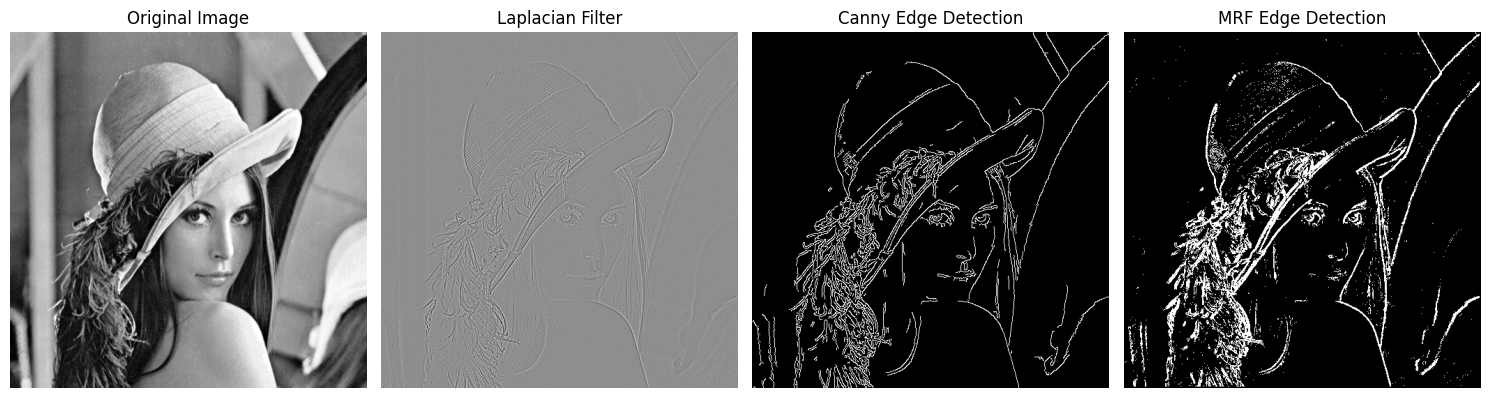

In [13]:
edges_mrf = mrf_edge_detection(image)

# Display images
fig, axarr = plt.subplots(1, 4, figsize=(15, 15))

axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')

axarr[1].imshow(laplacian, cmap='gray')
axarr[1].set_title('Laplacian Filter')
axarr[1].axis('off')

axarr[2].imshow(edges_canny, cmap='gray')
axarr[2].set_title('Canny Edge Detection')
axarr[2].axis('off')

axarr[3].imshow(edges_mrf, cmap='gray')
axarr[3].set_title('MRF Edge Detection')
axarr[3].axis('off')

plt.tight_layout()
plt.show()

### Question:

Comment about the visual differences of the edge detection algorithms implemented above. Modify the percentil in the `mrf_edge_detection` function and describe its impact in the output image.

Answer : 

In the above subplot visualization, we have four images:

Original Image: It's the reference image in grayscale with no filtering or edge detection applied.

Laplacian Filter: The Laplacian operator highlights areas of rapid intensity change, enhancing edges but also amplifying noise. It captures edges by detecting the second derivative of the image, making the edges appear sharper and more sensitive to fine details.

Canny Edge Detection: It's a multi-stage edge detection algorithm that combines Gaussian filtering with gradient computation and edge linking. It produces thinner, well-defined edges with better noise suppression compared to the Laplacian filter. this method is more robust, especially in terms of detecting continuous and significant edges, while minimizing false edges.

MRF Edge Detection: This method typically uses probabilistic modeling to detect edges, which can provide a smooth, denoised image. The edges here tend to be more contextual, depending on neighboring pixel information. it can produce more natural and smoother boundaries.

##### Effect of Changing the Percentile in MRF Edge Detection
In MRF-based edge detection, the percentile determines a threshold that controls how "hard" the edges appear. A higher percentile would select a higher threshold for edge detection, reducing the number of detected edges by ignoring weaker boundaries, resulting in fewer, but clearer and sharper edges. Conversely, a lower percentile would result in more edges being detected, including weaker or less prominent ones, which could make the image appear noisier but more detailed in terms of the edges.

##### Modifying the percentile impacts:

Higher Percentile: Fewer, but more prominent edges, making the detection more selective.

Lower Percentile: More edges are detected, including weak and potentially noisy ones, leading to a more detailed, but potentially noisier result.

### Differences of algorithms 

Laplacian Filter: Detects edges by calculating the second derivative of the image, highlighting areas with rapid intensity changes. It's highly sensitive to fine details but also amplifies noise.

Canny Edge Detection: A multi-step process that includes smoothing the image, finding intensity gradients, and linking strong edges while suppressing weak ones and noise. It produces clean, thin, and well-defined edges.

MRF (Markov Random Field) Edge Detection: Uses probabilistic modeling based on the relationships between neighboring pixels to detect edges. It creates smoother, softer edges, focusing on contextual edge detection with less noise sensitivity.

### Description when modifying the percentil

Modifying the percentile in the MRF edge detection essentially adjusts the sensitivity of the algorithm. A higher percentile filters out weaker edges, focusing only on the strongest boundaries, making the image cleaner but possibly losing finer details. On the other hand, a lower percentile retains more subtle edges, adding detail but potentially introducing noise. This tweak allows for flexible control over edge detection, balancing between clarity and detail.